## Required Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("titanic_cleaned.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Deck_T,Deck_U,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,AgeBin_Teen,AgeBin_Adult,AgeBin_MiddleAge,AgeBin_Senior
0,1,0,3,"Braund, Mr. Owen Harris",-0.592481,0.432793,-0.473674,A/5 21171,-0.502445,Unknown,...,False,True,False,True,False,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.638789,0.432793,-0.473674,PC 17599,0.786845,C85,...,False,False,False,False,True,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",-0.284663,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,Unknown,...,False,True,True,False,False,False,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.407926,0.432793,-0.473674,113803,0.420730,C123,...,False,False,False,False,True,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",0.407926,-0.474545,-0.473674,373450,-0.486337,Unknown,...,False,True,False,True,False,False,False,True,False,False


In [3]:
X = df.drop(columns=["Survived", "Name", "Ticket", "Cabin", "PassengerId"])
y = df["Survived"]

## Split The Data For Train and Test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Training 3 Models

## Logistic Regression Model

In [5]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression
Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       110
           1       0.81      0.75      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



## Decision Tree Model

In [6]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree
Accuracy: 0.770949720670391
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       110
           1       0.71      0.70      0.70        69

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



## Random Forest Model

In [7]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       110
           1       0.77      0.72      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



## Hyperparameter Tuning For Each Model

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define parameter grid
param_grid_log = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l2", "none"],   # l1 requires saga solver, we'll keep it simple
    "solver": ["lbfgs"]
}

log_reg = LogisticRegression(max_iter=1000, random_state=42)

grid_log = GridSearchCV(log_reg, param_grid_log, cv=5, scoring="accuracy")
grid_log.fit(X_train, y_train)

print("Best parameters:", grid_log.best_params_)
print("Best CV score:", grid_log.best_score_)
print("Test set score:", grid_log.score(X_test, y_test))

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV score: 0.8188909681867429
Test set score: 0.8379888268156425


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

In [9]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4, 6]
}

dt = DecisionTreeClassifier(random_state=42)

grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring="accuracy")
grid_dt.fit(X_train, y_train)

print("Best parameters:", grid_dt.best_params_)
print("Best CV score:", grid_dt.best_score_)
print("Test set score:", grid_dt.score(X_test, y_test))

Best parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best CV score: 0.8175416133162612
Test set score: 0.8324022346368715


In [10]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

rf = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring="accuracy", n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best parameters:", grid_rf.best_params_)
print("Best CV score:", grid_rf.best_score_)
print("Test set score:", grid_rf.score(X_test, y_test))

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best CV score: 0.8315473259135231
Test set score: 0.8100558659217877


## Classification Report

In [11]:
from sklearn.metrics import accuracy_score, classification_report

# Compare tuned models
models = {
    "Logistic Regression": grid_log,
    "Decision Tree": grid_dt,
    "Random Forest": grid_rf
}

for name, model in models.items():
    print("="*50)
    print(f"{name}")
    print("="*50)

    # Best hyperparameters
    print("Best Parameters:", model.best_params_)
    print("Best CV Score:", model.best_score_)

    # Predictions
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {acc:.4f}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=["Did not survive", "Survived"]))
    print("\n")

Logistic Regression
Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Score: 0.8188909681867429
Test Accuracy: 0.8380

Classification Report:
                 precision    recall  f1-score   support

Did not survive       0.85      0.89      0.87       110
       Survived       0.81      0.75      0.78        69

       accuracy                           0.84       179
      macro avg       0.83      0.82      0.83       179
   weighted avg       0.84      0.84      0.84       179



Decision Tree
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best CV Score: 0.8175416133162612
Test Accuracy: 0.8324

Classification Report:
                 precision    recall  f1-score   support

Did not survive       0.84      0.90      0.87       110
       Survived       0.82      0.72      0.77        69

       accuracy                           0.83       179
      macro avg       0.83      0.81      0.82       179
   weighted avg       0.83  

## **We Choose The Logistic Regression Model**

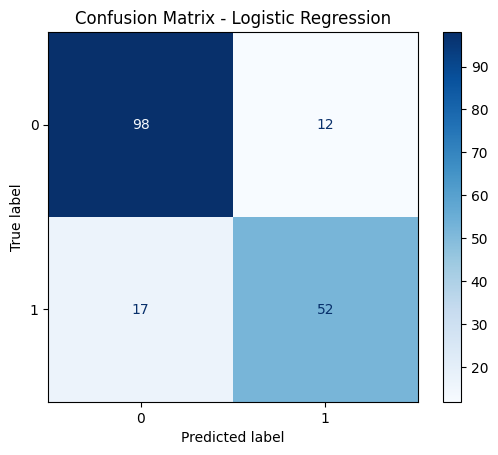

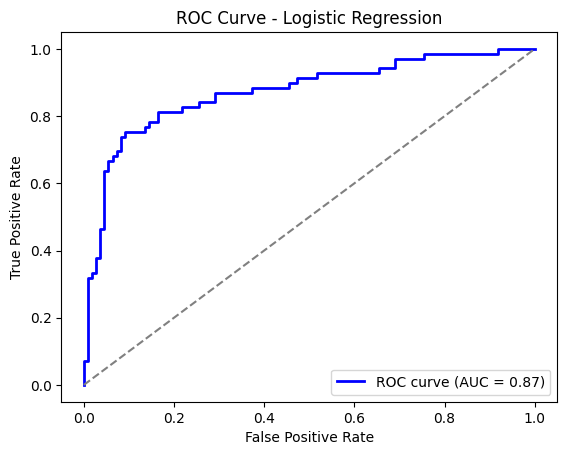

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_test, grid_log.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_log.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC Curve
y_prob = grid_log.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

## **Save The Model**

In [14]:
import joblib
joblib.dump(log_reg, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']